In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

In [2]:
def wave(nt,nx,dt,dx,c,u0,u_t0):
    un = np.zeros((nt,nx))
    kappa = (c*dt/dx)**2
    un[0,:] = u0
    un[1,1:-2] = un[0,1:-2] - dt*u_t0[1:-2] + 0.5*kappa*(un[0,2:-1] - 2*un[0,1:-2]+un[0,0:-3])
    un[1,0] = 0 #гран.условия
    un[1,-1] = 0 #гран.условия
    for i in range(1,nt-1):
        un[i+1,1:-2] = 2*un[i,1:-2] - un[i-1,1:-2] + kappa*(un[i,2:-1] - 2*un[i,1:-2]+un[i,0:-3])
        un[i+1,0] = 0 #нач.условия
        un[i+1,-1] = 0 #нач.условия
    return un

In [3]:
#генерируем начальные условия на скорость и координату
def u0_init(nx,A,L,m):
    x = np.linspace(0,L,nx)
    u0 = A*np.exp(-7*(x-0.2*L)**2) #тут просто оттянули струну по гауссиане
    return u0

def u_t0_init(nx,A,L,m):
    x = np.linspace(0,L,nx)
    u_t0 = np.zeros(nx) #нет начальной скорости
    return u_t0

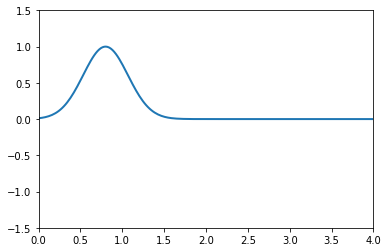

In [4]:
c = 10.0 #скорость
time = 10.0 #полное время
L = 4.0 #полная длина
nx = 200 #количество пространственных интервалов
dx = L/nx #шаг пространственного интервала
dt = dx/c #шаг временного интервала
nt = int(time/dt) #количество временных интервалов

#Задаем начальные параметры
m = 1 #количество узлов в начальных параметрах
A = 1.0 #амплитуда в начальных параметрах

u0 = u0_init(nx,A,L,m)
u_t0 = u_t0_init(nx,A,L,m)

def animate(data):
    x = np.linspace(0,L,nx)
    y = data
    line.set_data(x,y)
    return line,

fig = plt.figure()
ax = plt.axes(xlim=(0,L),ylim=(-1.5*A,1.5*A))
line, = ax.plot([],[],lw=2)


un0 = wave(nt,nx,dt,dx,c,u0,u_t0)
anim0 = animation.FuncAnimation(fig,animate,frames=un0,interval=1)
plt.show()

In [5]:
HTML(anim0.to_html5_video())